In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

mpl.rc('font', family='Malgun Gothic')

In [3]:
df_member = pd.read_csv('./Member_data02.csv')
df_product = pd.read_csv('./Product_data.csv')
df_sales = pd.read_csv('./Sales_data02.csv')

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_8548\3122442656.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv('./Sales_data02.csv')


In [3]:
df_sales['고객번호(float)'] = df_sales['고객번호'].astype('float64')

In [4]:
df_sales['배송시작일_dt'] = pd.to_datetime(df_sales['배송시작일'])
df_sales['구매일_dt'] = pd.to_datetime(df_sales['구매일'])

df_sales['연도'] = df_sales['구매일_dt'].dt.year
df_sales['월'] = df_sales['구매일_dt'].dt.month

In [5]:
# cond1 = df_sales['연도'] == 2019
# cond2 = df_sales['연도'] == 2020
# cond3 = (df_sales['월'] >= 1) & (df_sales['월'] <= 3)
# cond4 = (df_sales['월'] >= 4) & (df_sales['월'] <= 6)
# cond5 = (df_sales['월'] >= 7) & (df_sales['월'] <= 9)
# cond6 = (df_sales['월'] >= 10) & (df_sales['월'] <= 12)

# df_sales.loc[cond1 & cond3, '분기구분'] = '19_1/4분기'
# df_sales.loc[cond1 & cond4, '분기구분'] = '19_2/4분기'
# df_sales.loc[cond1 & cond5, '분기구분'] = '19_3/4분기'
# df_sales.loc[cond1 & cond6, '분기구분'] = '19_4/4분기'
# df_sales.loc[cond2 & cond3, '분기구분'] = '20_1/4분기'
# df_sales.loc[cond2 & cond4, '분기구분'] = '20_2/4분기'
# df_sales.loc[cond2 & cond5, '분기구분'] = '20_3/4분기'
# df_sales.loc[cond2 & cond6, '분기구분'] = '20_4/4분기'

In [6]:
df_merge = pd.merge(df_member, df_sales, left_on = 'ID', right_on = '고객번호(float)', how = 'left')
df_merge.dropna(inplace = True)

In [7]:
df_merge['고객수'] = 1

In [8]:
df_merge['연령'].value_counts()

33.0    22747
32.0    21225
34.0    20950
31.0    19353
35.0    17067
30.0    14615
36.0    12858
29.0     9233
37.0     8239
28.0     6063
38.0     4921
27.0     3286
39.0     2537
26.0     1635
40.0     1264
25.0      691
41.0      509
24.0      233
42.0      206
23.0      109
43.0       46
22.0       38
21.0        6
44.0        5
46.0        3
20.0        1
Name: 연령, dtype: int64

In [9]:
cond1 = (df_merge['연령'] >= 20) & (df_merge['연령'] < 30)
cond2 = (df_merge['연령'] >= 30) & (df_merge['연령'] < 35)
cond3 = (df_merge['연령'] >= 35) & (df_merge['연령'] < 40)
cond4 = (df_merge['연령'] >= 40)

df_merge.loc[cond1, '연령구분'] = '20대'
df_merge.loc[cond2, '연령구분'] = '30대초반'
df_merge.loc[cond3, '연령구분'] = '30대후반'
df_merge.loc[cond4, '연령구분'] = '40대이상'

In [15]:
p1 = df_merge.pivot_table(index = 'ID', columns = '연령구분', values = '고객수', aggfunc = 'min').reset_index()
age_list = [p1['20대'].sum(), 
            p1['30대초반'].sum(), 
            p1['30대후반'].sum(), 
            p1['40대이상'].sum()]
df_age = pd.DataFrame(age_list, index = ['20대', '30대초반', '30대후반', '40대이상'], columns = ['고객수']).reset_index()
df_age

,index,고객수
0,20대,8491.0
1,30대초반,38518.0
2,30대후반,17800.0
3,40대이상,737.0


<AxesSubplot: xlabel='index', ylabel='고객수'>

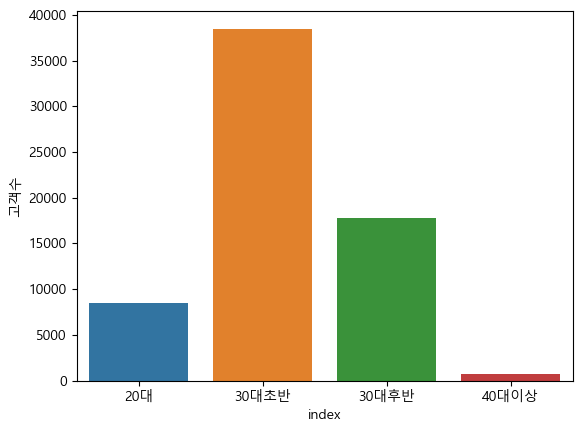

In [16]:
sns.barplot(data = df_age, x = 'index', y = '고객수')

In [17]:
cond1 = df_merge['구매시월령(수정)'] < 0
cond2 = (df_merge['구매시월령(수정)'] >= 0) & (df_merge['구매시월령(수정)'] <= 3)
cond3 = (df_merge['구매시월령(수정)'] > 3) & (df_merge['구매시월령(수정)'] <= 6)
cond4 = (df_merge['구매시월령(수정)'] > 6) & (df_merge['구매시월령(수정)'] <= 12)
cond5 = (df_merge['구매시월령(수정)'] > 12) & (df_merge['구매시월령(수정)'] <= 18)
cond6 = (df_merge['구매시월령(수정)'] > 18) & (df_merge['구매시월령(수정)'] <= 24)
cond7 = (df_merge['구매시월령(수정)'] > 24) & (df_merge['구매시월령(수정)'] <= 36)
cond8 = (df_merge['구매시월령(수정)'] > 36) & (df_merge['구매시월령(수정)'] <= 48)
cond9 = (df_merge['구매시월령(수정)'] > 48) & (df_merge['구매시월령(수정)'] <= 60)
cond10 = (df_merge['구매시월령(수정)'] > 60) & (df_merge['구매시월령(수정)'] <= 72)
cond11 = (df_merge['구매시월령(수정)'] > 72) & (df_merge['구매시월령(수정)'] <= 84)
cond12 = (df_merge['구매시월령(수정)'] > 84) & (df_merge['구매시월령(수정)'] <= 96)
cond13 = df_merge['구매시월령(수정)'] > 96

df_merge.loc[cond1, '월령구분'] = '태아'
df_merge.loc[cond2, '월령구분'] = '0-3개월'
df_merge.loc[cond3, '월령구분'] = '3-6개월'
df_merge.loc[cond4, '월령구분'] = '6-12개월'
df_merge.loc[cond5, '월령구분'] = '12-18개월'
df_merge.loc[cond6, '월령구분'] = '18-24개월'
df_merge.loc[cond7, '월령구분'] = '2-3세'
df_merge.loc[cond8, '월령구분'] = '3-4세'
df_merge.loc[cond9, '월령구분'] = '4-5세'
df_merge.loc[cond10, '월령구분'] = '5-6세'
df_merge.loc[cond11, '월령구분'] = '6-7세'
df_merge.loc[cond12, '월령구분'] = '7-8세'
df_merge.loc[cond13, '월령구분'] = '8세이상'

In [25]:
p1 = df_merge.pivot_table(index = 'ID', columns = '월령구분', values = '고객수', aggfunc = 'min')
pd.options.display.float_format = '{:.1f}'.format
print(p1.sum())

월령구분
0-3개월     26911.0
12-18개월    7276.0
18-24개월    3263.0
2-3세       3824.0
3-4세       2433.0
3-6개월     16595.0
4-5세       1778.0
5-6세       1235.0
6-12개월    16964.0
6-7세        826.0
7-8세        554.0
8세이상       1420.0
태아        11352.0
dtype: float64


In [29]:
pd.DataFrame(p1.sum(), columns = ['고객수'])

,고객수
월령구분,
0-3개월,26911.0
12-18개월,7276.0
18-24개월,3263.0
2-3세,3824.0
3-4세,2433.0
3-6개월,16595.0
4-5세,1778.0
5-6세,1235.0
6-12개월,16964.0


In [31]:
p1 = df_merge.pivot_table(index = 'ID', columns = '물품대분류', values = '고객수', aggfunc = 'min')
p1.sum()

물품대분류
FC      5530.0
FMC     9669.0
SKC     5197.0
SrC       10.0
기저귀    18445.0
기타      4650.0
더블하트   19558.0
물티슈     4572.0
체험팩    24662.0
팬티     13455.0
dtype: float64

In [34]:
p1 = df_merge.pivot_table(index = '유입경로', values = '결제금액', aggfunc = 'mean').reset_index()

<AxesSubplot: xlabel='유입경로', ylabel='결제금액'>

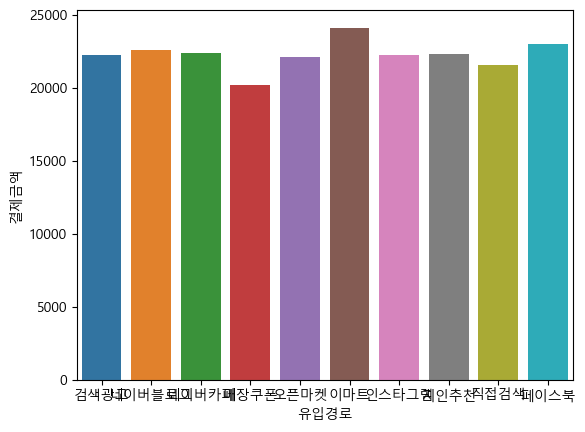

In [35]:
sns.barplot(data = p1, x = '유입경로', y = '결제금액')

In [38]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167840 entries, 0 to 199582
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           167840 non-null  float64       
 1   성별           167840 non-null  object        
 2   결혼유무         167840 non-null  object        
 3   거주지역         167840 non-null  object        
 4   연령           167840 non-null  float64       
 5   결제등록카드       167840 non-null  object        
 6   유입경로         167840 non-null  object        
 7   자녀여부         167840 non-null  object        
 8   주문번호         167840 non-null  object        
 9   구매일          167840 non-null  object        
 10  배송시작일        167840 non-null  object        
 11  배송완료일        167840 non-null  object        
 12  구매시월령(수정)    167840 non-null  float64       
 13  고객번호         167840 non-null  object        
 14  구매금액         167840 non-null  float64       
 15  결제금액         167840 non-null  floa

In [43]:
p1 = df_merge.pivot_table(index = 'ID', values = '결제금액', aggfunc = 'sum').reset_index()

cond1 = p1['결제금액'] >= 500000
cond2 = (p1['결제금액'] >= 300000) & (p1['결제금액'] < 500000)
cond3 = (p1['결제금액'] >= 100000) & (p1['결제금액'] < 300000)
cond4 = p1['결제금액'] < 100000

p1.loc[cond1, '고객구분'] = 'VIP'
p1.loc[cond2, '고객구분'] = 'Gold'
p1.loc[cond3, '고객구분'] = 'Silver'
p1.loc[cond4, '고객구분'] = 'Basic'

p1

,ID,결제금액,고객구분
0,201812310749735.0,54083.0,Basic
1,201812310749771.0,47922.0,Basic
2,201812310749774.0,116532.0,Silver
3,201812310749780.0,19900.0,Basic
4,201812310749784.0,166877.0,Silver
...,...,...,...
65541,201912291058150.0,19602.0,Basic
65542,201912291058151.0,3000.0,Basic
65543,201912291058154.0,14406.0,Basic
65544,201912291058168.0,163234.0,Silver


In [48]:
df2 = pd.merge(df_merge, p1, on = 'ID', how = 'left')
df2

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,주문번호,구매일,...,고객번호(float),배송시작일_dt,구매일_dt,연도,월,고객수,연령구분,월령구분,결제금액_y,고객구분
0,201812310749735.0,여,기혼,인천,37.0,국민은행,인스타그램,Yes,201905052342970,2019-05-06,...,201812310749735.0,2019-05-07,2019-05-06,2019.0,5.0,1,30대후반,3-6개월,54083.0,Basic
1,201812310749735.0,여,기혼,인천,37.0,국민은행,인스타그램,Yes,202002203424450,2020-02-20,...,201812310749735.0,2020-02-21,2020-02-20,2020.0,2.0,1,30대후반,12-18개월,54083.0,Basic
2,201812310749771.0,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,201905132367003,2019-05-13,...,201812310749771.0,2019-05-14,2019-05-13,2019.0,5.0,1,30대초반,5-6세,47922.0,Basic
3,201812310749774.0,여,미혼,경남,34.0,기업은행,지인추천,No,201905092356247,2019-05-10,...,201812310749774.0,2019-05-11,2019-05-10,2019.0,5.0,1,30대초반,3-6개월,116532.0,Silver
4,201812310749774.0,여,미혼,경남,34.0,기업은행,지인추천,No,201907282649358,2019-07-29,...,201812310749774.0,2019-07-30,2019-07-29,2019.0,7.0,1,30대초반,6-12개월,116532.0,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167835,201912291058168.0,여,기혼,충북,26.0,삼성카드,검색광고,Yes,201912293246297,2019-12-29,...,201912291058168.0,2019-12-30,2019-12-29,2019.0,12.0,1,20대,6-12개월,163234.0,Silver
167836,201912291058168.0,여,기혼,충북,26.0,삼성카드,검색광고,Yes,202001313357732,2020-02-01,...,201912291058168.0,2020-02-02,2020-02-01,2020.0,2.0,1,20대,6-12개월,163234.0,Silver
167837,201912291058168.0,여,기혼,충북,26.0,삼성카드,검색광고,Yes,202002033367542,2020-02-04,...,201912291058168.0,2020-02-05,2020-02-04,2020.0,2.0,1,20대,6-12개월,163234.0,Silver
167838,201912291058168.0,여,기혼,충북,26.0,삼성카드,검색광고,Yes,20200718082624-57943215331,2020-07-18,...,201912291058168.0,2020-07-19,2020-07-18,2020.0,7.0,1,20대,12-18개월,163234.0,Silver


In [50]:
df_basic = df2[df2['고객구분'] == 'Basic']
p1 = df_basic.pivot_table(index = 'ID', columns = '유입경로', values = '고객수', aggfunc = 'min')
p1.sum()

유입경로
검색광고      5592.0
네이버블로그   15217.0
네이버카페     3928.0
매장쿠폰       324.0
오픈마켓      1387.0
이마트        146.0
인스타그램    21093.0
지인추천      5401.0
직접검색       794.0
페이스북       927.0
dtype: float64

In [52]:
df_silver = df2[df2['고객구분'] == 'Silver']
p1 = df_silver.pivot_table(index = 'ID', columns = '유입경로', values = '고객수', aggfunc = 'min')
p1.sum()

유입경로
검색광고      911.0
네이버블로그   2552.0
네이버카페     587.0
매장쿠폰       34.0
오픈마켓      211.0
이마트        22.0
인스타그램    3500.0
지인추천      908.0
직접검색      118.0
페이스북      165.0
dtype: float64

In [55]:
df_30 = df2[df2['연령구분'] == '30대초반']
p1 = df_30.pivot_table(index = 'ID', columns = '물품대분류', values = '고객수', aggfunc = 'min')
p1.sum()

물품대분류
FC      3283.0
FMC     5648.0
SKC     3075.0
SrC        6.0
기저귀    10865.0
기타      2766.0
더블하트   11437.0
물티슈     2672.0
체험팩    14544.0
팬티      7856.0
dtype: float64

In [11]:
import scipy.stats as stats

In [6]:
df_product['물품대분류'].value_counts()

기타      1245
더블하트     385
팬티       384
FC       255
FMC      225
기저귀      224
SKC      159
체험팩       89
물티슈       77
SrC        5
Name: 물품대분류, dtype: int64

In [7]:
df_diaper = df_product[(df_product['물품대분류'] == '더블하트') | ((df_product['물품대분류'] == '팬티') | ((df_product['물품대분류'] == '기저귀')))]

In [9]:
df_diaper.sort_values(by = '제품단가', ascending = False)

,물품대분류,상품명,물품판매량,제품단가
650,기저귀,[모닛X하기스] 스마트 베이비 모니터,3,498333
689,기저귀,2020 하기스 매직 컴포트 1단계 공용 264매(밴드형) X3,4,214500
693,기저귀,2020 하기스 매직 컴포트 2단계 공용 246매(밴드형) X3,9,214500
2735,팬티,2020 하기스 매직팬티 컴포트 4단계 여아 132매(팬티형) X3,23,200400
2729,팬티,2020 하기스 매직팬티 컴포트 3단계 여아 160매(팬티형) X3,14,200400
...,...,...,...,...
756,기저귀,하기스 NEW 네이처메이드 썸머 2단계 공용 140매(밴드형) X 2,5,0
2880,팬티,하기스 NEW 네이처메이드 썸머팬티 6단계 공용 58매(팬티형) X 2,7,0
758,기저귀,하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형) X 2,27,0
759,기저귀,하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형) X 3,1,0


In [35]:
cond1 = df_diaper['상품명'].str.contains('에어솔솔')
cond2 = df_diaper['상품명'].str.contains('맥스드라이')
cond3 = df_diaper['상품명'].str.contains('밤부')
cond4 = df_diaper['상품명'].str.contains('오가닉')
cond5 = df_diaper['상품명'].str.contains('매직핏')
cond6 = df_diaper['상품명'].str.contains('컴포트')

p1 = df_diaper[cond1].pivot_table(index = '상품명', values = ['물품판매량', '제품단가'], aggfunc = 'sum')
sales1 = p1['물품판매량'].sum()
price1 = p1['제품단가'].mean()

p2 = df_diaper[cond2].pivot_table(index = '상품명', values = ['물품판매량', '제품단가'], aggfunc = 'sum')
sales2 = p2['물품판매량'].sum()
price2 = p2['제품단가'].mean()

p3 = df_diaper[cond3].pivot_table(index = '상품명', values = ['물품판매량', '제품단가'], aggfunc = 'sum')
sales3 = p3['물품판매량'].sum()
price3 = p3['제품단가'].mean()

p4 = df_diaper[cond4].pivot_table(index = '상품명', values = ['물품판매량', '제품단가'], aggfunc = 'sum')
sales4 = p4['물품판매량'].sum()
price4 = p4['제품단가'].mean()

p5 = df_diaper[cond5].pivot_table(index = '상품명', values = ['물품판매량', '제품단가'], aggfunc = 'sum')
sales5 = p5['물품판매량'].sum()
price5 = p5['제품단가'].mean()

p6 = df_diaper[cond6].pivot_table(index = '상품명', values = ['물품판매량', '제품단가'], aggfunc = 'sum')
sales6 = p6['물품판매량'].sum()
price6 = p6['제품단가'].mean()

sales_list = [[sales1, sales2, sales3, sales4, sales5, sales6],
             [price1, price2, price3, price4, price5, price6]]
new_df = pd.DataFrame(sales_list).T
new_df = new_df.rename(columns = { 0 : '판매량', 1 : '평균단가' }, index = {0 : '에어솔솔', 1 : '맥스드라이', 2 : '밤부', 3 : '오가닉', 4 : '매직핏', 5 : '컴포트'})

new_df

,판매량,평균단가
에어솔솔,3856.0,68098.311111
맥스드라이,9067.0,74447.591398
밤부,7265.0,117936.777778
오가닉,757.0,169345.642857
매직핏,3728.0,72554.145455
컴포트,8562.0,86289.483516


<AxesSubplot: xlabel='평균단가', ylabel='판매량'>

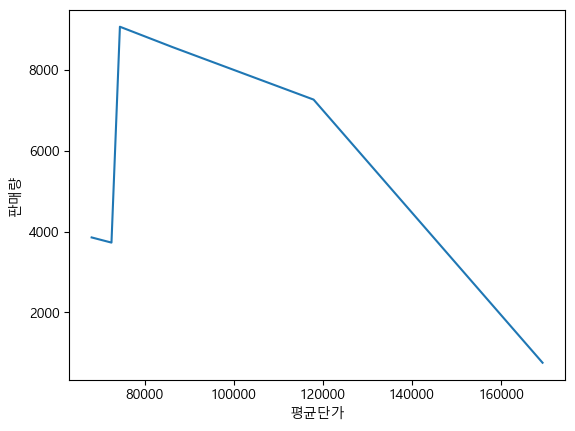

In [34]:
sns.lineplot(data = new_df, y = '판매량', x = '평균단가')

In [5]:
df_sales

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)
...,...,...,...,...,...,...,...,...,...,...
199994,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,20200724113017315991,11700,9240,FMC,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA)
199995,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000,3000,체험팩,맘큐 허그박스
199996,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,20200803075905757887,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA)
199997,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,20200805170229147688,3000,3000,체험팩,맘큐 허그박스
